# Q1 - PCA

## a

Since we want to find the Eigenvector ("u") which maximizes the variance of the projections of X on the Eigenvector, we want to find the following optimization problem:

$\underset{u}{\operatorname{argmax}} \space \frac{1}{m}\sum_{i=1}^{m}(\sum_{j=1}^{d}X_{ij}u_j - \mu)^2 = \space \frac{1}{m}\sum_{i=1}^{m}(\sum_{j=1}^{d}X_{ij}u_j)^2$ 
, since $\mu$ equals zero after the normalization

We can easily see that if we take an Eigenvactor of a very large size, we will always maximize more and more, and so we have to add a constraint on the size of that Eigenvector - $||u||^2 = 1$

## b

The demand says we would like the covariance between the two terms to be zero. Note - it doesn't necessarily mean that they will be independent. So the mathematical demand is:

$Cov(u_1^T X_i, u_2^T X_i) = \frac{1}{m}\sum_{i=1}^{m} u_1 X_i^T u_2^T X_i = \frac{1}{m}u_1u_2^T\sum_{i=1}^{m}X_i^TX_i = \frac{1}{m}u_2^T(\sum_{i=1}^{m}X_i^TX_i)u_1 $ = 0

Since $u_1$ is an Eigenvector with an Eigenvalue $\lambda_1 \neq 0$, the above equation must satisfy $u_2^Tu_1 = 0$, prooving $u_1$ and $u_2$ are orthogonal

# Q2 - True or False

## 1

## 2

# Q3 - K-means

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import warnings
# warnings.filterwarnings('ignore')

## a

In [149]:
data = pd.read_csv('data.csv')

In [150]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## b

In [254]:
def dist(x1,x2):
    return np.sqrt(sum((x1[i]-x2[i])*(x1[i]-x2[i]) for i in range(len(x1))))

## c

In [259]:
def k_means(data,k):
    # initialize centers randomly:
    columns = data.columns.values
    M = np.zeros((k,np.shape(data)[1])) # centers
    for i,col in enumerate(columns):
        for clust in range(k):
            M[clust,i] = random.uniform(data[col].min(),data[col].max())
    
    M_old = np.zeros((k,np.shape(data)[1])) # centers
    while(np.abs(np.max(M-M_old))>0): # convergence creterion
        M_old = np.copy(M)
        # calculate for each point the distance to the center of one of the k clusters:
        cluster_array = np.zeros((np.shape(data)[0],k))
        for i in range(np.shape(data)[0]):
            for k_ind in range(k):
                cluster_array[i,k_ind] = dist(data.loc[i,:].values,M_old[k_ind,:])
        assigned_clusters = np.argmin(cluster_array,axis = 1)
        # calculate new centers
        for i,col in enumerate(columns):
            for k_ind in range(k):
                M[k_ind,i] = np.sum(data.iloc[assigned_clusters == k_ind,i])/np.sum(assigned_clusters == k_ind)
#         print(M)
#         print(np.sum(np.min(cluster_array,axis = 1)))
  
    # calculate the objective function (M_old = M at that point)
    objective_function = np.sum(np.min(cluster_array,axis = 1))
    return objective_function # The total variance
    

## d

In [256]:
# Normalize the data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data_normalized = pd.DataFrame(np_scaled, columns = columns)

In [257]:
# run several times for each k

In [260]:
results = np.zeros((9,5))
for k in range(2,11):
    for i in range(5):
        print(i,k)
        results[k-2,i] = k_means(data_normalized,k)

0 2
1 2
2 2
3 2
4 2
0 3
1 3
2 3
3 3
4 3
0 4
1 4
2 4
3 4
4 4
0 5
1 5
2 5
3 5
4 5
0 6
1 6
2 6
3 6
4 6
0 7
1 7
2 7
3 7
4 7
0 8
1 8
2 8
3 8
4 8
0 9
1 9
2 9
3 9
4 9
0 10
1 10
2 10
3 10
4 10


In [261]:
results

array([[602.93478481, 602.93478481, 591.66050971, 591.66050971,
        602.93478481],
       [300.49732714, 300.49732714, 300.50173906, 300.4964235 ,
        300.50173906],
       [282.11983092, 279.13471694, 282.49580553, 279.26815609,
        291.50643649],
       [261.74073204, 268.22047585, 261.67645425, 261.65859548,
        272.84573927],
       [247.75061989, 251.94637228, 243.61409947, 686.74324604,
        243.5792032 ],
       [229.91841244, 238.13369097, 227.14306553, 226.31580582,
        236.41686585],
       [222.90770256, 221.99996964, 213.26467145, 216.70268909,
        361.92422104],
       [205.14804556, 217.18486599, 208.88664859, 199.29165579,
        535.16178401],
       [446.03589555, 200.71578656, 595.29055133, 440.8131931 ,
        525.4559245 ]])

In [262]:
np.min(results, axis = 1)

array([591.66050971, 300.4964235 , 279.13471694, 261.65859548,
       243.5792032 , 226.31580582, 213.26467145, 199.29165579,
       200.71578656])

In [ ]:
# plot

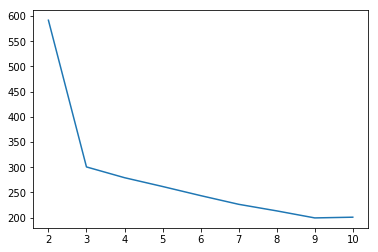

In [267]:
plt.plot(range(2,11),np.min(results, axis = 1))
plt.show();

# TO DELETE

We solve the above maximization problem by defining a lagragian, and take the derivative by each $u_j$:

$ L(u,\lambda) = \frac{1}{m}\sum_{i=1}^{m}(\sum_{j=1}^{d}X_{ij}u_j)^2 - \lambda((\sum_{j=1}^{d}u_j)^2 - 1)$

For $u_1\space$: $\frac{\partial L}{\partial u_1} = \frac{2}{m}\sum_{i=1}^{m}(\sum_{j=1}^{d}X_{ij}u_j)X_{i1} - 2\lambda u_1 = 0$

and we get : 

$(\frac{1}{m}\sum_{i=1}^{m}X_{ij}X_{i1}) \space\sum_{j=1}^{d}u_j = \lambda u_1$

The first term on the left is the covariance matrix of attribute $X_1$ with all attributes or basicly the complete covariance matrix.

$\sum_{j=1}^{d}cov(X_1,X_j) \space u_j = \lambda u_1$

We showed that $u_1$ must be an Eigenvector and this Eigenvector maximizes the variance. All other numbers are the following Eigenvectors. 

The variance of the projected points along the Eigenvector $u_1$: 

$\space \frac{1}{m}\sum_{i=1}^{m}(\sum_{j=1}^{d}X_{ij}u_j)^2$